In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


###Load the data

In [3]:
df = pd.read_csv('npf_train.csv')
df

,id,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
0,1,2000-01-01,nonevent,False,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
1,2,2000-01-20,nonevent,False,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2,3,2000-01-23,nonevent,False,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
3,4,2000-02-17,nonevent,False,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
4,5,2000-03-25,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,454,2011-08-14,nonevent,False,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,...,16.470062,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253
454,455,2011-08-16,nonevent,False,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,...,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
455,456,2011-08-18,nonevent,False,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,...,13.315270,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391
456,457,2011-08-21,nonevent,False,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,...,14.421092,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457


###Make new column for binary prediction

In [4]:
df.loc[df['class4'] == 'nonevent', 'binary'] = 'nonevent'
df.loc[df['class4'] != 'nonevent', 'binary'] = 'event'
df

,id,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,binary
0,1,2000-01-01,nonevent,False,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,...,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733,nonevent
1,2,2000-01-20,nonevent,False,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,...,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572,nonevent
2,3,2000-01-23,nonevent,False,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,...,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048,nonevent
3,4,2000-02-17,nonevent,False,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,...,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751,nonevent
4,5,2000-03-25,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,...,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210,event
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,454,2011-08-14,nonevent,False,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,...,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253,nonevent
454,455,2011-08-16,nonevent,False,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,...,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425,nonevent
455,456,2011-08-18,nonevent,False,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,...,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391,nonevent
456,457,2011-08-21,nonevent,False,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,...,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457,nonevent


###Split data into train and test sets for multiclass and binary models
###Fit the model into a logistic regression model


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,4:-1], df['class4'], test_size=0.30, random_state=42)
X_trainb, X_testb, y_trainb, y_testb = train_test_split(df.iloc[:,4:-1], df['binary'], test_size=0.30, random_state=42)
## Scaling data
scaler = StandardScaler()
scaler.fit(X_train.values) 
scaler.fit(X_test.values) 
scaler.fit(X_trainb.values)
scaler.fit(X_testb.values) 
X = scaler.transform(X_train.values)
X_test = scaler.transform(X_test.values)
Xb = scaler.transform(X_trainb.values)
X_testb = scaler.transform(X_testb.values) 
## Multiclass
lr = LogisticRegression()
lr.fit(X, y_train)
## Binary
lr_bin = LogisticRegression()
lr_bin.fit(Xb, y_trainb)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

###Plot confusion matrix of predictions and accuracy score
####Multiclass

0.6304347826086957


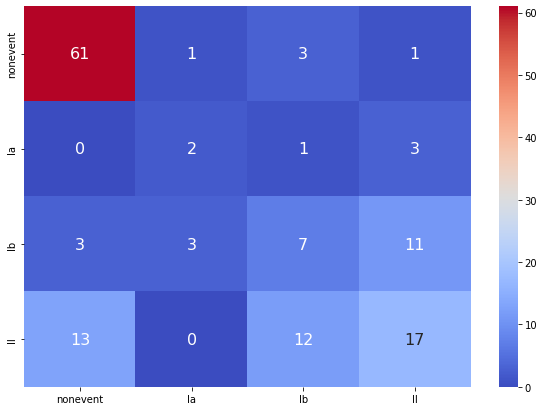

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

yhat = lr.predict(X_test)
true = y_test.values
df_cm = pd.DataFrame(confusion_matrix(true, yhat, labels=['nonevent', 'Ia', 'Ib', 'II']), index=['nonevent', 'Ia', 'Ib', 'II'], columns=['nonevent', 'Ia', 'Ib', 'II'])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='coolwarm', annot_kws={"size": 16},  fmt=".0f")

print(lr.score(X_test, y_test))

####Binary

0.855072463768116

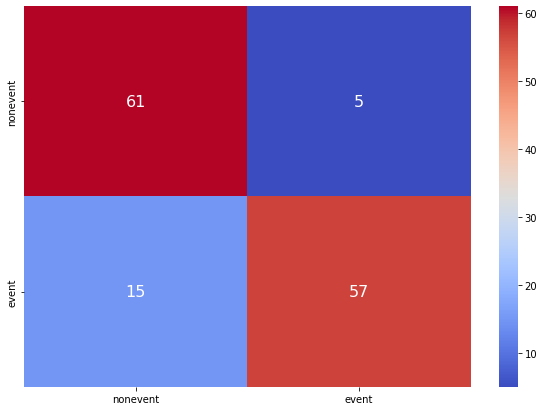

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

yhat_bin = lr_bin.predict(X_testb)
true_bin = y_testb
df_cm = pd.DataFrame(confusion_matrix(true_bin, yhat_bin, labels=['nonevent', 'event']), index=['nonevent', 'event'], columns=['nonevent', 'event'])

plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='coolwarm', annot_kws={"size": 16},  fmt=".0f")
lr_bin.score(X_testb, y_testb)

###Trying to achieve better results with Multi Layer Perceptron


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectFromModel
#scaling the data between [0,1]
X = scaler.transform(X_train.values) 
y = y_train

parameters = {'solver':['adam', 'sgd'],
              'activation':('relu', 'logistic'),
              'learning_rate_init':[0.0001, 0.001, 0.01],
              'random_state':(1, 2, 3, 4, 5),
              'max_iter':[1000, 5000, 10000]
              }

mlp = MLPClassifier(hidden_layer_sizes=(226, 74, 16, 4), learning_rate='adaptive')
clf = RandomizedSearchCV(mlp, parameters)
clf.fit(X, y.values)

print(clf.best_params_)
print(clf.score(X_test.values, y_test.values))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupte

{'solver': 'sgd', 'random_state': 5, 'max_iter': 10000, 'learning_rate_init': 0.0001, 'activation': 'relu'}
0.4782608695652174


**With randomized search, ok hyperparameters found with 0.6087 accuracy**:
```
{'solver': 'sgd', 'random_state': 5, 'max_iter': 10000, 'learning_rate_init': 0.001, 'activation': 'relu'}
```

####Using GridSearchCV to look for better results:



In [36]:
parameters = {'solver':['sgd', 'adam'],
              'activation':['relu'],
              'learning_rate_init':[0.001],
              'random_state':[5],
              'max_iter':[10000]
              }

clf = GridSearchCV(mlp, parameters, cv=2)
clf.fit(X, y.values)

print(clf.best_params_)
print(clf.score(X_test, y_test))

{'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 10000, 'random_state': 5, 'solver': 'sgd'}
0.6304347826086957


In [37]:
parameters = {'solver':['sgd', 'adam'],
              'activation':['relu'],
              'learning_rate_init':[0.001],
              'random_state':[5],
              'max_iter':[10000]
              }

clf_b = GridSearchCV(mlp, parameters, cv=2)
clf_b.fit(Xb, y_trainb)

print(clf.best_params_)
print(clf.score(X_testb, y_testb))

{'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 10000, 'random_state': 5, 'solver': 'sgd'}
0.41304347826086957


####Final results:

In [42]:
print(f'Logistic regression multiclass accuracy: {lr.score(X_test, y_test)}')
print('\n')
print(f'Logistic regression binary accuracy: {lr_bin.score(X_testb, y_testb)}')
print('\n')
print(f'Multi layer perceptron multiclass accuracy: {clf.score(X_test, y_test)}')
print('\n')
print(f'Multi layer perceptron binary accuracy: {clf_b.score(X_testb, y_testb)}')

Logistic regression multiclass accuracy: 0.6304347826086957


Logistic regression binary accuracy: 0.855072463768116


Multi layer perceptron multiclass accuracy: 0.6304347826086957


Multi layer perceptron binary accuracy: 0.8260869565217391
